In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/rants.tsv', delimiter='\t', quoting=3)

In [2]:
data['hate'].describe()

count    311.000000
mean       0.766380
std        0.120749
min        0.275205
25%        0.690905
50%        0.801731
75%        0.857040
max        0.954524
Name: hate, dtype: float64

<Axes: xlabel='hate', ylabel='Count'>

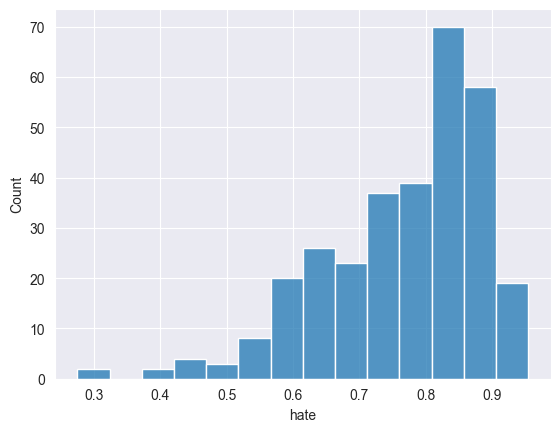

In [3]:
import seaborn as sns

sns.histplot(data['hate'])

<Axes: xlabel='timestamp', ylabel='hate'>

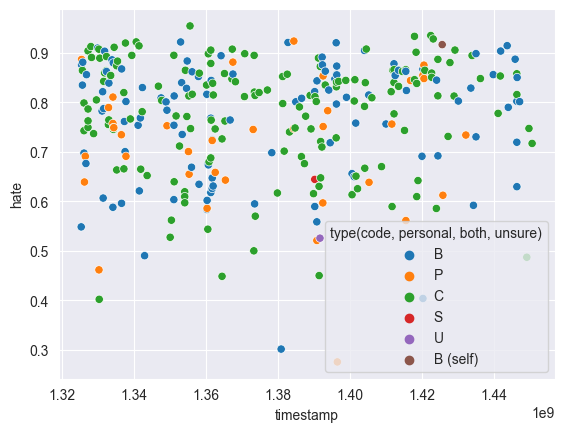

In [4]:
sns.scatterplot(data=data,y='hate', x='timestamp',hue='type(code, personal, both, unsure)')

<Axes: xlabel='type(code, personal, both, unsure)', ylabel='Count'>

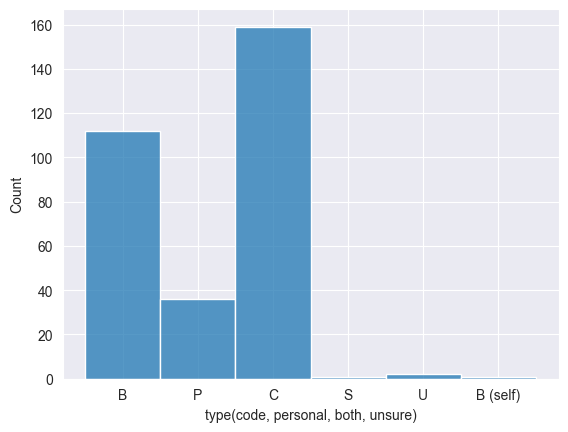

In [5]:
sns.histplot(data['type(code, personal, both, unsure)'], hue_norm='type(code, personal, both, unsure)')

<Axes: xlabel='type(code, personal, both, unsure)', ylabel='hate'>

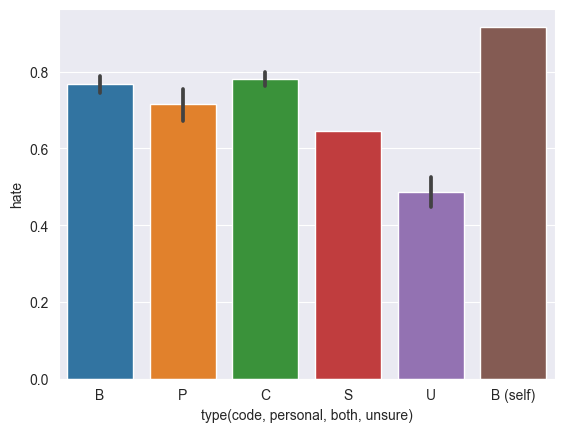

In [6]:
sns.barplot(x=data['type(code, personal, both, unsure)'], y=data['hate'])

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['mail excerpt'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    words = stopwords.words('english')
    words.remove('not')
    words.remove('was')
    words.remove('no')
    review = [ps.stem(word) for word in review if not word in set(words)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus[10:14]

['statement nonsens get past understand nonsens understand bit clear feel free bring without idiot statement argument',
 'stop spout garbag',
 'f imagin someth like chrome would need massiv amount privileg total disast everi singl respect stop push crap no ptrace wonder lsm audit idea billion time wors respect no way hell ever fix lsm audit usabl stop bother even bring dead jim',
 'insan barrier cannot possibl anyth sane realli make differ seriou problem whole f cking thing nak patch saniti restor total voodoo program']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=300)
X = cv.fit_transform(corpus).toarray()

In [10]:
import joblib
joblib.dump(cv,'count_vectorizer')

['count_vectorizer']

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=100)
pca.fit(X)
X = pca.transform(X)

In [12]:
y = data['hate'].to_numpy().reshape(-1,1)

np.savetxt('data/X.txt',X)
np.savetxt('data/y.txt',y)